In [1]:
from snipr import StemGroups, QuadPaths
import numpy as np

In [15]:
seq = "".join([x.rstrip('\n').upper() for x in open('chr22.fa').readlines()[1:]])
len(seq)

FileNotFoundError: [Errno 2] No such file or directory: 'chr22.fa'

In [219]:
loop_probs = np.array([
    0.50860458,  0.15217531,  0.08495005,  0.0549146 ,  0.03100226,
    0.03100226,  0.02320335,  0.01585562,  0.01160168,  0.00986142,
    0.00928134,  0.00689655,  0.00702546,  0.00670319,  0.00496294,
    0.00489849,  0.00315823,  0.0026426 ,  0.00270706,  0.00238479,
    0.00283597,  0.00174025,  0.00186916,  0.00212697,  0.00199807, 0.00174025])
loop_probs = loop_probs/loop_probs[0]
bulge_probs = np.array([ 0.78772061,  0.13447676,  0.05100671,  0.02679592])
bulge_probs = bulge_probs/bulge_probs[0]

seq = "AGGGAAGGGAAGGGAAGGGAGGGAGGGAGGAGGGA" * 10


def get_scores():
    scores = np.zeros(len(seq), dtype=int)
    sg_object = StemGroups(seq, 26, 3, 'G')
    for stem_group in sg_object.generate_stems():
        qp_object = QuadPaths(stem_group, 26, loop_probs, bulge_probs)
        for qp, s in qp_object.generate_quadpaths():
            scores[qp[scores[qp] < s]] = s
    return scores

def get_info(scores):
    arcs = []
    graph_info = []
    sg_object = StemGroups(seq, 26, 3, 'G')
    for stem_group in sg_object.generate_stems():
        qp_object = QuadPaths(stem_group, 26, loop_probs, bulge_probs)
        n = 0
        for qp, s in qp_object.generate_quadpaths():
            if s == scores[qp[0]] == scores[qp[-1]]:
                arcs.append((qp[0], qp[-1]+1, s))
            n += 1
        if len(qp_object.G.nodes()) > 0:
            nodes = np.array(list(qp_object.nodeCodes.values()))
            graph_info.append([len(qp_object.G.nodes()), len(qp_object.G.edges()),
                               n, nodes.min(), nodes.max()])
    return arcs, np.array(graph_info)

scores = get_scores()
arcs, graph_info = get_info(scores)
sum(scores), graph_info.sum(axis=0)

100%|██████████| 345/345 [00:00<00:00, 46269.58it/s]


(142988, array([  228,  3660, 32252,     1,   348]))

In [234]:
arcs

[(16, 32, 809),
 (51, 67, 809),
 (86, 102, 809),
 (121, 137, 809),
 (156, 172, 809),
 (191, 207, 809),
 (226, 242, 809),
 (261, 277, 809),
 (296, 312, 809),
 (331, 347, 809)]

In [235]:
list(scores)

[0,
 300,
 300,
 300,
 0,
 0,
 391,
 391,
 391,
 0,
 0,
 562,
 562,
 562,
 0,
 0,
 809,
 809,
 809,
 0,
 809,
 809,
 809,
 0,
 809,
 809,
 809,
 0,
 809,
 809,
 0,
 809,
 358,
 358,
 0,
 0,
 358,
 358,
 358,
 0,
 0,
 391,
 391,
 391,
 0,
 0,
 562,
 562,
 562,
 0,
 0,
 809,
 809,
 809,
 0,
 809,
 809,
 809,
 0,
 809,
 809,
 809,
 0,
 809,
 809,
 0,
 809,
 358,
 358,
 0,
 0,
 358,
 358,
 358,
 0,
 0,
 391,
 391,
 391,
 0,
 0,
 562,
 562,
 562,
 0,
 0,
 809,
 809,
 809,
 0,
 809,
 809,
 809,
 0,
 809,
 809,
 809,
 0,
 809,
 809,
 0,
 809,
 358,
 358,
 0,
 0,
 358,
 358,
 358,
 0,
 0,
 391,
 391,
 391,
 0,
 0,
 562,
 562,
 562,
 0,
 0,
 809,
 809,
 809,
 0,
 809,
 809,
 809,
 0,
 809,
 809,
 809,
 0,
 809,
 809,
 0,
 809,
 358,
 358,
 0,
 0,
 358,
 358,
 358,
 0,
 0,
 391,
 391,
 391,
 0,
 0,
 562,
 562,
 562,
 0,
 0,
 809,
 809,
 809,
 0,
 809,
 809,
 809,
 0,
 809,
 809,
 809,
 0,
 809,
 809,
 0,
 809,
 358,
 358,
 0,
 0,
 358,
 358,
 358,
 0,
 0,
 391,
 391,
 391,
 0,
 0,
 562,
 562,
 5

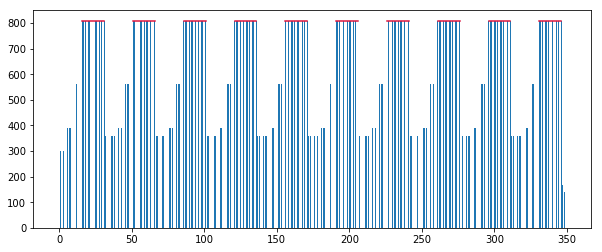

In [229]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ind = list(range(len(scores)))
ax.bar(ind, scores, width=1, linewidth=0)
for i in arcs:
    x = range(i[0], i[1])
    ax.plot(range(i[0], i[1]), [i[2] for y in range(len(x))], color='crimson')
plt.show()

In [209]:
scores

array([  0, 391, 391, 391,   0,   0, 562, 562, 562,   0,   0, 562, 562,
       562,   0, 562, 562, 562,   0, 562, 562, 562,   0,   0, 562, 562,
       562,   0,   0, 562, 562, 562,   0,   0, 562, 562, 562,   0, 562,
       562, 562,   0, 562, 562, 562,   0])